# Chapter 5 and 6: Estimation and hypothesis testing: the CAPM

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf  # to perform the econometric tests
import matplotlib.pyplot as plt
import pickle                          # to save and re-load a Python workfile

### Creating a dataset "data" and save it to a Python workfile "capm.pickle"

In [3]:
abspath = 'D:/OneDrive/Data/Brooks4e/'
data = pd.read_excel(abspath + 'capm.xls', index_col=0)
data.head()

,SANDP,FORD,GE,MICROSOFT,ORACLE,USTB3M
Date,,,,,,
2002-01-01,1130.199951,15.30,37.150002,31.855000,17.260000,1.68
2002-02-01,1106.729980,14.88,38.500000,29.170000,16.620001,1.76
2002-03-01,1147.390015,16.49,37.400002,30.155001,12.800000,1.83
2002-04-01,1076.920044,16.00,31.549999,26.129999,10.040000,1.75
2002-05-01,1067.140015,17.65,31.139999,25.455000,7.920000,1.76


In [4]:
# Create a user-defined function to calculate logarithmic returns

def LogDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    x_diff = x_diff.dropna()
    return x_diff

In [5]:
data = pd.DataFrame({'ret_sandp': LogDiff(data['SANDP']),
                    'ret_ford': LogDiff(data['FORD']),
                    'USTB3M': data['USTB3M']/12,
                    'ersandp': LogDiff(data['SANDP']) - data['USTB3M']/12,
                    'erford': LogDiff(data['FORD']) - data['USTB3M']/12})
data.head()

,ret_sandp,ret_ford,USTB3M,ersandp,erford
Date,,,,,
2002-01-01,NaN,NaN,0.140000,NaN,NaN
2002-02-01,-2.098486,-2.783480,0.146667,-2.245153,-2.930147
2002-03-01,3.608011,10.273611,0.152500,3.455511,10.121111
2002-04-01,-6.338466,-3.016541,0.145833,-6.484299,-3.162375
2002-05-01,-0.912297,9.814706,0.146667,-1.058964,9.668039


In [6]:
# Save a Python workfile using "pickle" library
# The file capm.pickle is created at the specified directory

with open(abspath + '/Work/capm.pickle', 'wb') as handle:
    pickle.dump(data, handle)

### Preliminary plots of the dataset

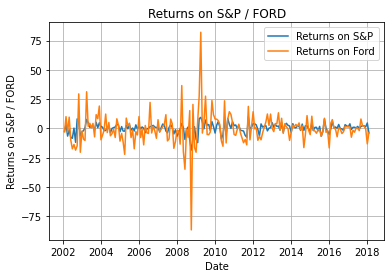

In [7]:
# Plot two series on the same graph

plt.figure(1)                  # Define a new figure object in default setting
plt.plot(data['ersandp'], label='Returns on S&P')
plt.plot(data['erford'], label='Returns on Ford')

plt.xlabel('Date')
plt.ylabel('Returns on S&P / FORD')
plt.title('Returns on S&P / FORD')
plt. grid(True)

plt.legend()
plt.show()

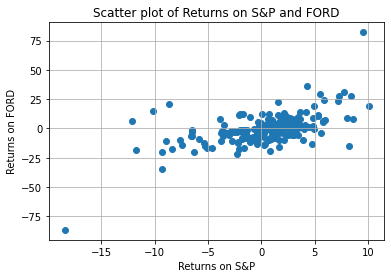

In [8]:
# Plot scatter plots of two series

plt.figure(2)
plt.scatter(data['ersandp'], data['erford'])

plt.xlabel('Returns on S&P')
plt.ylabel('Returns on FORD')
plt.title('Scatter plot of Returns on S&P and FORD')
plt.grid(True)

plt.show()

### Estimating the CAPM equation and performing hypothesis test

In [9]:
# Estimating the CAPM equation for FORD

formula = 'erford ~ ersandp'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 erford   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     97.26
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           8.36e-19
Time:                        21:51:18   Log-Likelihood:                -735.26
No. Observations:                 193   AIC:                             1475.
Df Residuals:                     191   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9560      0.793     -1.205      0.2

In [10]:
# F-test: hypothesis testing that beta = 1

hypotheses = 'ersandp = 1'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[21.5604412]]), p=6.36532103603562e-06, df_denom=191, df_num=1>


### Demonstrating re-loading a Python workfile and performing multiple hypothesis tests 

In [11]:
# Re-load a Python workfile using "pickle"

with open(abspath + '/Work/capm.pickle', 'rb') as handle:
    pickle_data = pickle.load(handle)

In [12]:
# F-test: multiple hypothesis tests
# Conduct a joint test that both the intercept and slope parameters are one

formula = 'erford ~ ersandp'
hypotheses = 'ersandp = Intercept = 1'

results = smf.ols (formula, pickle_data).fit()
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[12.9437402]]), p=5.349256152606693e-06, df_denom=191, df_num=2>
